In [1]:
from utils import *


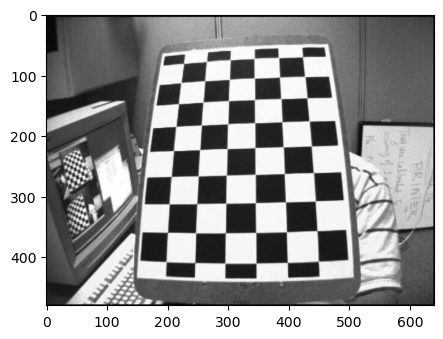

In [2]:
img = readImage('./input/opencv_data/left12.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage(img_gray, cmap='gray')

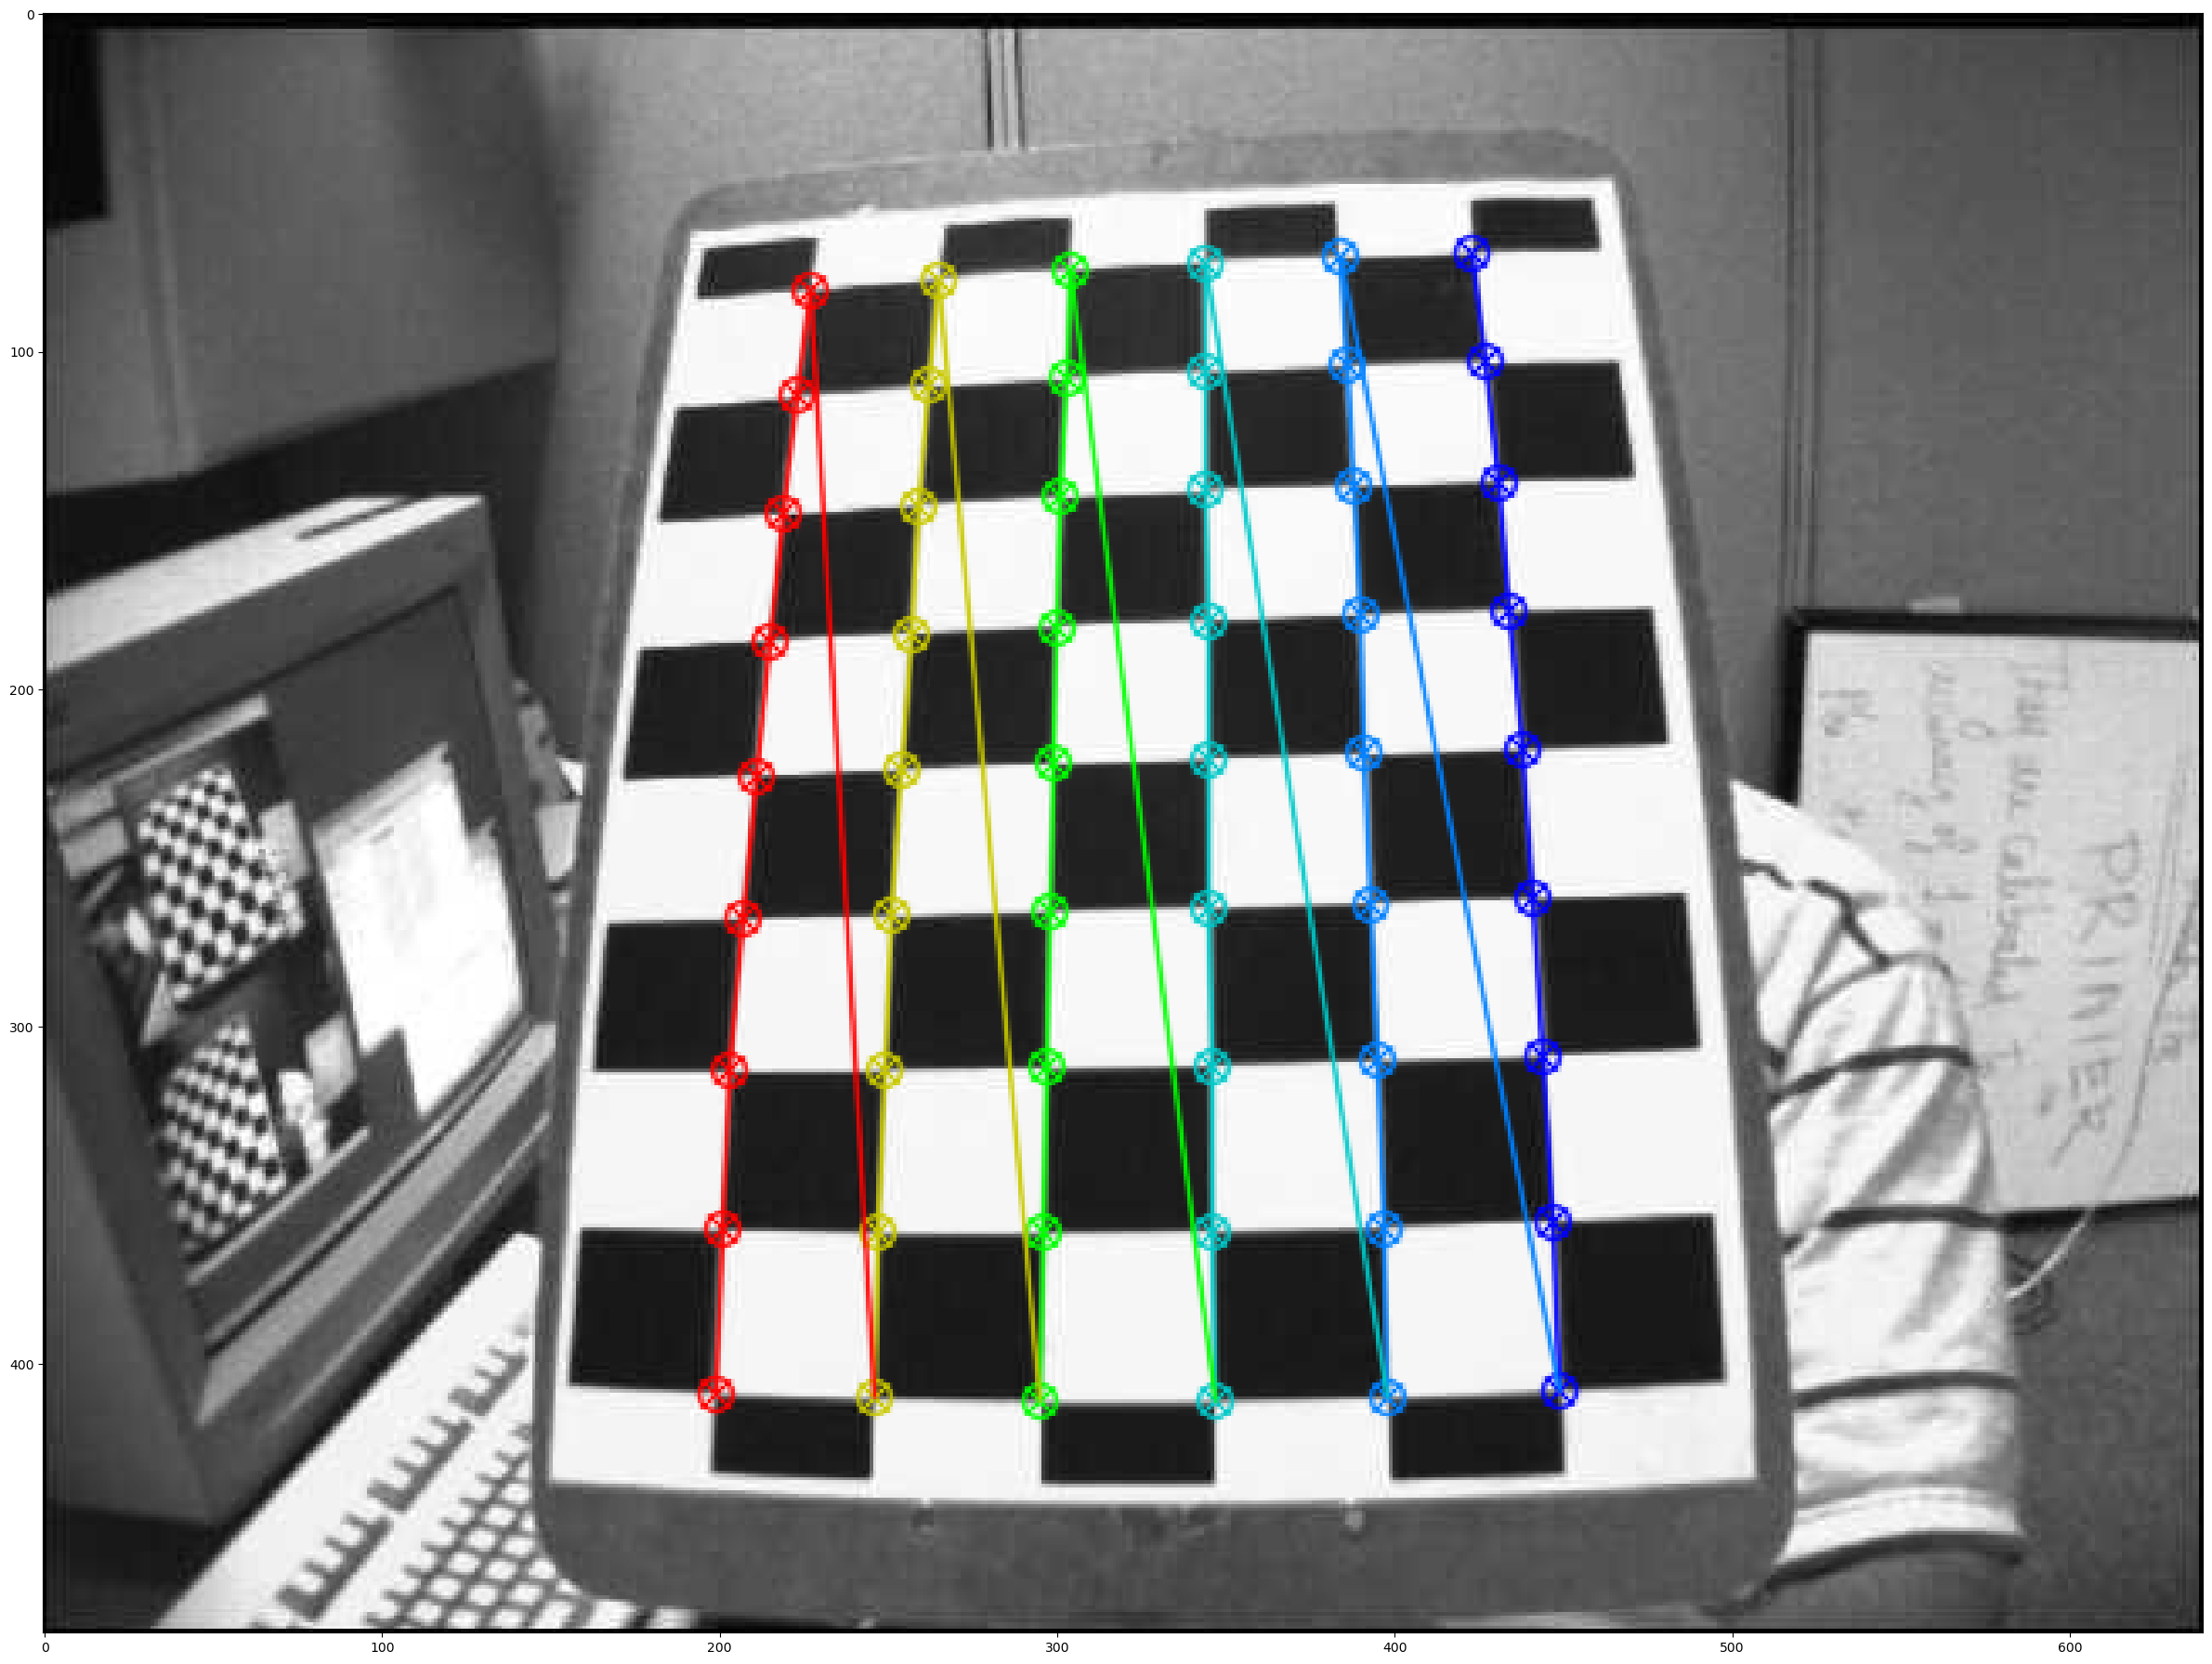

In [3]:
objpoints = []
imgpoints = []
img_tmp = img.copy()
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
ret, corners = cv.findChessboardCorners(img_gray, (9, 6))
if ret == True:
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(img_gray,corners, (11,11), (-1,-1), criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001))
    imgpoints.append(corners)
    # 绘制并显示拐角
    cv.drawChessboardCorners(img_tmp, (9,6), corners2, ret)
showImage(img_tmp, figsize=(30, 30))

In [4]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, img_gray.shape[::-1], None, None) 


In [5]:
h,  w = img_gray.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [6]:
newcameramtx

array([[608.0620247 ,   0.        , 332.3745316 ],
       [  0.        , 609.70790799, 228.75598277],
       [  0.        ,   0.        ,   1.        ]])

In [7]:
 # undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# 剪裁图像
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

True

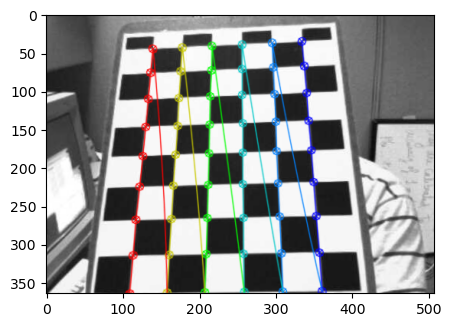

In [8]:
dst = cv.undistort(img_tmp, mtx, dist, None, newcameramtx)
# 剪裁图像
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
showImage(dst)

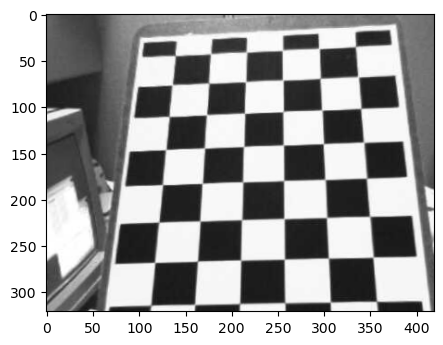

In [9]:
# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# 裁剪图像
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
showImage(dst)

In [10]:
def draw(img, corners, imgpts, index=0):
    img = img.copy()
    corner = tuple(corners[index].ravel().astype(np.int32))
    img = cv.line(img, corner, tuple(imgpts[0].ravel().astype(np.int32)), (255,0,0), 5)     
    img = cv.line(img, corner, tuple(imgpts[1].ravel().astype(np.int32)), (0,255,0), 5)
    img = cv.line(img, corner, tuple(imgpts[2].ravel().astype(np.int32)), (0,0,255), 5)
    return img

In [11]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

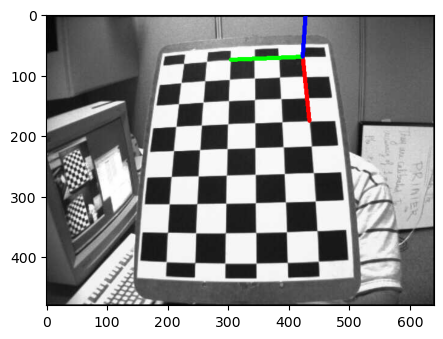

In [12]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (9,6),None)
if ret == True:
    corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    # 找到旋转和平移矢量。
    ret,rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)
    # 将3D点投影到图像平面
    imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)
    dest = draw(img,corners2,imgpts)
    showImage(dest)


In [13]:
tuple(corners2[0].ravel())

(423.46674, 70.89233)

In [14]:
def draw(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    # 用绿色绘制底层
    img = cv.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)
    # 用蓝色绘制高
    for i,j in zip(range(4),range(4,8)):
        img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    # 用红色绘制顶层
    img = cv.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img

In [15]:
axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],                    [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])


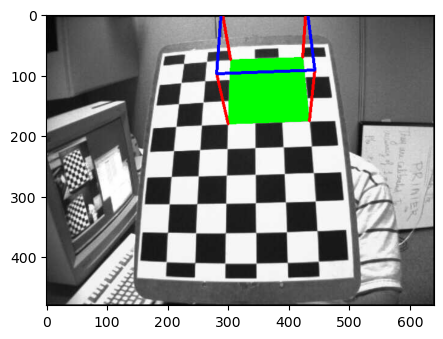

In [16]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (9,6),None)
if ret == True:
    corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    # 找到旋转和平移矢量。
    ret,rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)
    # 将3D点投影到图像平面
    imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)
    dest = draw(img,corners2,imgpts)
    showImage(dest)
